# Illconditioned matrices

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# the function that returns a Hilbert Matrix
def Hilbert(n):
    matrix = np.zeros((n,n))
    for i in range(1, n+1):
        for j in range(1, n+1):
            matrix[i-1][j-1]= 1/float(j + i -1)
    return matrix
        
Hilbert(3)

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.5       ,  0.33333333,  0.25      ],
       [ 0.33333333,  0.25      ,  0.2       ]])

In [28]:
def Krel(ndarray):
    U,s,V = np.linalg.svd(ndarray)
    sigMax = max(s)
    sigMin = min(s)
    return sigMax/sigMin
Krel(Hilbert(2))

19.281470067903967

In [4]:
# you can check if they are match on http://www-an.acs.i.kyoto-u.ac.jp/~fujiwara/server/hilbert20.html
# it's not when i > 10, maybe due to numerical issues
for i in [10, 15, 20, 25]:
    print Krel(Hilbert(i))

1.60250281681e+13
2.49595175001e+17
2.10653055807e+18
1.89342450283e+19


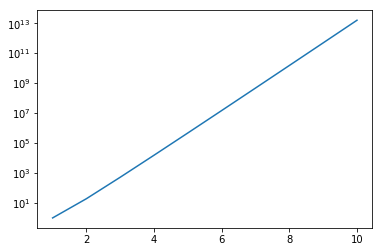

In [29]:
# plot the condition number of first 10 Hilbert matrix
r = range(1, 11)
plt.yscale("log")
plt.plot(r, [Krel(Hilbert(i)) for i in r])

In [6]:
# direct get inv and dot multiply together
r = 20
t0 = np.random.rand(r)
t1 = np.random.rand(r)

print np.linalg.norm (np.linalg.inv(Hilbert(r)).dot(Hilbert(r)).dot(t0) - t0)
print np.linalg.norm (np.linalg.inv(Hilbert(r)).dot(Hilbert(r)).dot(t1) - t1)

# solve an equation
b0 = Hilbert(r).dot(t0)
b1 = Hilbert(r).dot(t1)

print np.linalg.norm (np.linalg.solve(Hilbert(r), b0) - t0)
print np.linalg.norm (np.linalg.solve(Hilbert(r), b1) - t1)


129494.238574
117066.680093
21.0930311302
50.6849991768


# Numerical issue in computing the variance

In [31]:
# the second one is 
def var1(v):
    ave = float(np.sum(v))/v.size
    Ave = np.ones(v.size)*ave
    return np.sum((v - Ave)*(v - Ave))/(v.size )
def var2(v):
    ave = float(np.sum(v))/v.size
    Ave = np.ones(v.size)*ave
    return (np.sum(v*v)-v.size*ave*ave)/(v.size)


test = np.random.normal(3, 0.0000001, 10000)

print np.var(test)
print var1(test)
print var2(test)

print (var1(test)-np.var(test))/np.var(test)
print (var2(test)-np.var(test))/np.var(test)

9.80514878376e-15
9.80514878376e-15
1.16415321827e-14
0.0
0.187287662781


# Approx Exp

In [26]:
import math
def factorial(n):return reduce(lambda x,y:x*y,[1]+range(1,n+1))
def Exp(x, N):
    r = range(0, N+1)
    pows = np.array([ float(np.power(x, i)) /factorial(i) for i in r]) 
    return np.sum(pows);

print Exp(1,8)

for i in [5,10,15]:
    print ""
    print str(i) + ": "
    print "  a: " 
    print Exp(-5.5,i)
    print "  b: "
    print 1/Exp(5.5, i)
    print "  c: "
    print np.power(Exp(0.5, i), -11)
    print "actual: " + str(math.exp(-5.5))


2.71827876984

5: 
  a: 
-20.9169270833
  b: 
0.00772665353404
  c: 
0.00408740827006
actual: 0.00408677143846

10: 
  a: 
2.37768445454
  b: 
0.00419264086335
  c: 
0.00408677143881
actual: 0.00408677143846

15: 
  a: 
-0.0211445741022
  b: 
0.00408758964264
  c: 
0.00408677143846
actual: 0.00408677143846
